<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [14]:
from bs4 import BeautifulSoup
import requests
# soup = BeautifulSoup(html_doc, 'html.parser')

In [3]:
station_names = ['RIT-ROOSEVELT', 'RIT-MANHATTAN', 'TOMPKINSVILLE', 'ST. GEORGE',
       'EASTCHSTER/DYRE', 'BAYCHESTER AV', 'GUN HILL RD', 'PELHAM PKWY',
       'MORRIS PARK', 'FLATBUSH AV-B.C', 'NEWKIRK AV', 'BEVERLY RD',
       'CHURCH AV', 'WINTHROP ST', 'STERLING ST', 'PRESIDENT ST',
       'NEW LOTS AV', 'VAN SICLEN AV', 'PENNSYLVANIA AV', 'JUNIUS ST',
       'ROCKAWAY AV', 'SARATOGA AV', 'SUTTER AV-RUTLD', 'CROWN HTS-UTICA',
       'KINGSTON AV', 'NOSTRAND AV', 'FRANKLIN AV', 'EASTN PKWY-MUSM',
       'GRAND ARMY PLAZ', 'BERGEN ST', 'ATL AV-BARCLAY', 'NEVINS ST',
       'HOYT ST', 'BOROUGH HALL', 'CLARK ST', '34 ST-HUDSON YD',
       'FLUSHING-MAIN', 'METS-WILLETS PT', '111 ST', '103 ST-CORONA',
       'JUNCTION BLVD', '90 ST-ELMHURST', '82 ST-JACKSON H',
       '74 ST-BROADWAY', '69 ST', '61 ST WOODSIDE', '52 ST',
       '46 ST BLISS ST', '40 ST LOWERY ST', '33 ST-RAWSON ST',
       'ASTORIA DITMARS', '30 AV', 'BROADWAY', '36 AV', '39 AV',
       'QUEENSBORO PLZ', 'COURT SQ', 'HUNTERS PT AV', 'VERNON-JACKSON',
       '5 AVE', 'PELHAM BAY PARK', 'BUHRE AV', 'MIDDLETOWN RD',
       'WESTCHESTER SQ', 'ZEREGA AV', 'CASTLE HILL AV', 'PARKCHESTER',
       'ST LAWRENCE AV', 'MORISN AV/SNDVW', 'ELDER AV', 'WHITLOCK AV',
       'HUNTS POINT AV', 'LONGWOOD AV', 'E 149 ST', "E 143/ST MARY'S",
       'CYPRESS AV', 'BROOK AV', '3 AV 138 ST', 'WAKEFIELD/241',
       'NEREID AV', '233 ST', '225 ST', '219 ST', 'BURKE AV',
       'ALLERTON AV', 'BRONX PARK EAST', 'E 180 ST', 'WEST FARMS SQ',
       '174 ST', 'FREEMAN ST', 'SIMPSON ST', 'INTERVALE AV',
       'PROSPECT AV', 'JACKSON AV', '3 AV-149 ST', 'HARLEM 148 ST',
       '145 ST', '135 ST', '125 ST', '116 ST', 'CENTRAL PK N110',
       'WOODLAWN', 'MOSHOLU PKWY', 'BEDFORD PK BLVD', 'KINGSBRIDGE RD',
       'FORDHAM RD', '183 ST', 'BURNSIDE AV', '176 ST', 'MT EDEN AV',
       '170 ST', '167 ST', '161/YANKEE STAD', '149/GRAND CONC',
       '138/GRAND CONC', '110 ST', '103 ST', '96 ST', '86 ST', '77 ST',
       '68ST-HUNTER CO', '59 ST', '51 ST', 'GRD CNTRL-42 ST', '33 ST',
       '28 ST', '23 ST', '14 ST-UNION SQ', 'ASTOR PL', 'BLEECKER ST',
       'SPRING ST', 'BROOKLYN BRIDGE', 'FULTON ST', 'WALL ST',
       'BOWLING GREEN', 'V.CORTLANDT PK', '238 ST', '231 ST',
       'MARBLE HILL-225', '215 ST', '207 ST', 'DYCKMAN ST', '191 ST',
       '181 ST', '157 ST', '137 ST CITY COL', '116 ST-COLUMBIA',
       'CATHEDRAL PKWY', '79 ST', '72 ST', '66 ST-LINCOLN',
       '59 ST COLUMBUS', '50 ST', 'TIMES SQ-42 ST', '34 ST-PENN STA',
       '18 ST', '14 ST', 'CHRISTOPHER ST', 'HOUSTON ST', 'CANAL ST',
       'FRANKLIN ST', 'CHAMBERS ST', 'PARK PLACE', 'WTC-CORTLANDT',
       'RECTOR ST', 'SOUTH FERRY', 'PATH NEW WTC', 'PATH WTC 2',
       'NEWARK HM HE', 'NEWARK C', 'NEWARK BM BW', 'THIRTY THIRD ST',
       'LACKAWANNA', 'THIRTY ST', 'TWENTY THIRD ST', '14TH STREET',
       '9TH STREET', 'CITY / BUS', 'PAVONIA/NEWPORT', 'EXCHANGE PLACE',
       'GROVE STREET', 'JOURNAL SQUARE', 'HARRISON', 'NEWARK HW BMEBE',
       'ORCHARD BEACH', '96 ST-2 AVE', '86 ST-2 AVE', '72 ST-2 AVE',
       'JAMAICA CENTER', 'SUTPHIN-ARCHER', 'JAMAICA VAN WK',
       '21 ST-QNSBRIDGE', 'ROOSEVELT ISLND', 'LEXINGTON AV/63', '57 ST',
       'NEPTUNE AV', 'AVENUE X', 'AVENUE U', 'KINGS HWY', 'AVENUE P',
       'AVENUE N', 'BAY PKWY', 'AVENUE I', '18 AV', 'DITMAS AV',
       'FT HAMILTON PKY', '15 ST-PROSPECT', '7 AV', '4 AV-9 ST',
       'SMITH-9 ST', 'CARROLL ST', 'YORK ST', 'EAST BROADWAY',
       'DELANCEY/ESSEX', '2 AV', 'GRAND ST', "B'WAY-LAFAYETTE",
       '34 ST-HERALD SQ', '42 ST-BRYANT PK', '47-50 STS ROCK',
       'CLINTON-WASH AV', 'CLASSON AV', 'BEDFORD-NOSTRAN',
       'MYRTLE-WILLOUGH', 'FLUSHING AV', 'METROPOLITAN AV', 'NASSAU AV',
       'GREENPOINT AV', '21 ST', 'JAMAICA 179 ST', '169 ST',
       'PARSONS BLVD', 'SUTPHIN BLVD', 'BRIARWOOD', 'KEW GARDENS',
       '75 AV', 'FOREST HILLS 71', '67 AV', '63 DR-REGO PARK',
       'WOODHAVEN BLVD', 'GRAND-NEWTOWN', 'ELMHURST AV',
       'JKSN HT-ROOSVLT', '65 ST', 'NORTHERN BLVD', '46 ST',
       'STEINWAY ST', '36 ST', 'QUEENS PLAZA', 'COURT SQ-23 ST',
       'LEXINGTON AV/53', '5 AV/53 ST', 'NORWOOD 205 ST', '182-183 STS',
       'TREMONT AV', '174-175 STS', '155 ST', 'FAR ROCKAWAY',
       'BEACH 25 ST', 'BEACH 36 ST', 'BEACH 44 ST', 'BEACH 60 ST',
       'BEACH 67 ST', 'ROCKAWAY PARK B', 'BEACH 105 ST', 'BEACH 98 ST',
       'BEACH 90 ST', 'BROAD CHANNEL', 'HOWARD BCH JFK',
       'AQUEDUCT RACETR', 'AQUEDUCT N.COND', 'OZONE PK LEFFRT', '104 ST',
       'ROCKAWAY BLVD', '88 ST', '80 ST', 'GRANT AV', 'EUCLID AV',
       'SHEPHERD AV', 'VAN SICLEN AVE', 'LIBERTY AV', 'BROADWAY JCT',
       'RALPH AV', 'UTICA AV', 'KINGSTON-THROOP', 'LAFAYETTE AV',
       'HOYT-SCHER', 'JAY ST-METROTEC', 'HIGH ST', 'WORLD TRADE CTR',
       'W 4 ST-WASH SQ', '42 ST-PORT AUTH', '81 ST-MUSEUM',
       '163 ST-AMSTERDM', '168 ST', '175 ST', '190 ST', 'INWOOD-207 ST',
       'FRESH POND RD', 'FOREST AVE', 'SENECA AVE', 'KNICKERBOCKER',
       'CENTRAL AV', 'JFK JAMAICA CT1', '121 ST', '85 ST-FOREST PK',
       '75 ST-ELDERTS', 'CYPRESS HILLS', 'CRESCENT ST', 'NORWOOD AV',
       'CLEVELAND ST', 'ALABAMA AV', 'CHAUNCEY ST', 'HALSEY ST',
       'GATES AV', 'KOSCIUSZKO ST', 'MYRTLE AV', 'LORIMER ST', 'HEWES ST',
       'MARCY AV', 'CANARSIE-ROCKAW', 'EAST 105 ST', 'NEW LOTS',
       'LIVONIA AV', 'SUTTER AV', 'ATLANTIC AV', 'BUSHWICK AV',
       'WILSON AV', 'MYRTLE-WYCKOFF', 'DEKALB AV', 'JEFFERSON ST',
       'MORGAN AV', 'MONTROSE AV', 'GRAHAM AV', 'BEDFORD AV', '1 AV',
       '3 AV', '6 AV', '8 AV', 'W 8 ST-AQUARIUM', 'CONEY IS-STILLW',
       'BAY 50 ST', '25 AV', '20 AV', '71 ST', '55 ST', '9 AV',
       'NEW UTRECHT AV', 'BAY RIDGE-95 ST', 'BAY RIDGE AV', '53 ST',
       '45 ST', '25 ST', '4AV-9 ST', 'UNION ST', 'OCEAN PKWY',
       'BRIGHTON BEACH', 'SHEEPSHEAD BAY', 'NECK RD', 'AVENUE M',
       'AVENUE J', 'AVENUE H', 'NEWKIRK PLAZA', 'CORTELYOU RD',
       'BEVERLEY ROAD', 'PARKSIDE AV', 'PROSPECT PARK', 'BOTANIC GARDEN',
       'BROAD ST', 'BOWERY', 'WHITEHALL S-FRY', 'CORTLANDT ST',
       'CITY HALL', 'PRINCE ST', '8 ST-NYU', '49 ST', '57 ST-7 AV',
       '5 AV/59 ST']

In [60]:
brooklyn_stations = '''7 AV BQ
PARK PLACE S
BOTANIC GARDEN S2345
PROSPECT PARK BQS
PARKSIDE AV BQ
CHURCH AV BQ
BEVERLEY ROAD BQ
CORTELYOU RD BQ
NEWKIRK PLAZA BQ
AVENUE H BQ
AVENUE J BQ
AVENUE M BQ
KINGS HWY BQ
AVENUE U BQ
NECK RD BQ
SHEEPSHEAD BAY BQ
BRIGHTON BEACH BQ
OCEAN PKWY Q
BOROUGH HALL R2345
JAY ST-METROTEC R
DEKALB AV BDNQR
ATL AV-BARCLAY BDNQR2345
UNION ST R
4AV-9 ST DFGMNR
PROSPECT AV R
25 ST R
36 ST DNR
45 ST R
53 ST R
59 ST NRW
BAY RIDGE AV R
77 ST R
86 ST R
BAY RIDGE-95 ST R
8 AV N
FT HAMILTON PKY N
NEW UTRECHT AV ND
18 AV N
20 AV N
BAY PKWY N
KINGS HWY N
AVENUE U N
86 ST N
9 AV D
FT HAMILTON PKY D
50 ST D
55 ST D
71 ST D
79 ST D
18 AV D
20 AV D
BAY PKWY D
25 AV D
BAY 50 ST D
CONEY IS-STILLW DFNQ
W 8 ST-AQUARIUM FQ
BEDFORD AV L
LORIMER ST LG
GRAHAM AV L
GRAND ST L
MONTROSE AV L
MORGAN AV L
JEFFERSON ST L
DEKALB AV L
MYRTLE-WYCKOFF LM
HALSEY ST L
WILSON AV L
BUSHWICK AV L
ATLANTIC AV L
SUTTER AV L
LIVONIA AV L
NEW LOTS L
EAST 105 ST L
CANARSIE-ROCKAW L
MARCY AV JMZ
HEWES ST JM
LORIMER ST JM
FLUSHING AV JM
MYRTLE AV JMZ
KOSCIUSZKO ST J
GATES AV JZ
HALSEY ST J
CHAUNCEY ST JZ
ALABAMA AV J
VAN SICLEN AV JZ
CLEVELAND ST J
NORWOOD AV JZ
CRESCENT ST JZ
CYPRESS HILLS J
CENTRAL AV M
KNICKERBOCKER M
HIGH ST AC
JAY ST-METROTEC ACF
HOYT-SCHER ACG
LAFAYETTE AV C
CLINTON-WASH AV C
FRANKLIN AV ACS
NOSTRAND AV AC
KINGSTON-THROOP C
UTICA AV AC
RALPH AV C
ROCKAWAY AV C
BROADWAY JCT ACJLZ
LIBERTY AV C
VAN SICLEN AVE C
SHEPHERD AV C
EUCLID AV AC
GREENPOINT AV G
NASSAU AV G
METROPOLITAN AV GL
BROADWAY G
FLUSHING AV G
MYRTLE-WILLOUGH G
BEDFORD-NOSTRAN G
CLASSON AV G
CLINTON-WASH AV G
FULTON ST G
YORK ST F
BERGEN ST FG
CARROLL ST FG
SMITH-9 ST FG
4 AV-9 ST DFGMNR
7 AV FG
15 ST-PROSPECT FG
FT HAMILTON PKY FG
CHURCH AV FG
DITMAS AV F
18 AV F
AVENUE I F
BAY PKWY F
AVENUE N F
AVENUE P F
KINGS HWY F
AVENUE U F
AVENUE X F
NEPTUNE AV F
CLARK ST 23
BOROUGH HALL 2345R
HOYT ST 23
NEVINS ST 2345
ATL AV-BARCLAY 2345BDNQR
BERGEN ST 23
GRAND ARMY PLAZ 23
EASTN PKWY-MUSM 23
FRANKLIN AV 2345S
NOSTRAND AV 3
KINGSTON AV 3
CROWN HTS-UTICA 34
SUTTER AV-RUTLD 3
SARATOGA AV 3
ROCKAWAY AV 3
JUNIUS ST 3
PENNSYLVANIA AV 3
VAN SICLEN AV 3
NEW LOTS AV 3
PRESIDENT ST 25
STERLING ST 25
WINTHROP ST 25
CHURCH AV 25
BEVERLY RD 25
NEWKIRK AV 25
FLATBUSH AV-B.C 25'''.split('\n')

In [61]:
brooklyn_stations

['7 AV BQ',
 'PARK PLACE S',
 'BOTANIC GARDEN S2345',
 'PROSPECT PARK BQS',
 'PARKSIDE AV BQ',
 'CHURCH AV BQ',
 'BEVERLEY ROAD BQ',
 'CORTELYOU RD BQ',
 'NEWKIRK PLAZA BQ',
 'AVENUE H BQ',
 'AVENUE J BQ',
 'AVENUE M BQ',
 'KINGS HWY BQ',
 'AVENUE U BQ',
 'NECK RD BQ',
 'SHEEPSHEAD BAY BQ',
 'BRIGHTON BEACH BQ',
 'OCEAN PKWY Q',
 'BOROUGH HALL R2345',
 'JAY ST-METROTEC R',
 'DEKALB AV BDNQR',
 'ATL AV-BARCLAY BDNQR2345',
 'UNION ST R',
 '4AV-9 ST DFGMNR',
 'PROSPECT AV R',
 '25 ST R',
 '36 ST DNR',
 '45 ST R',
 '53 ST R',
 '59 ST NRW',
 'BAY RIDGE AV R',
 '77 ST R',
 '86 ST R',
 'BAY RIDGE-95 ST R',
 '8 AV N',
 'FT HAMILTON PKY N',
 'NEW UTRECHT AV ND',
 '18 AV N',
 '20 AV N',
 'BAY PKWY N',
 'KINGS HWY N',
 'AVENUE U N',
 '86 ST N',
 '9 AV D',
 'FT HAMILTON PKY D',
 '50 ST D',
 '55 ST D',
 '71 ST D',
 '79 ST D',
 '18 AV D',
 '20 AV D',
 'BAY PKWY D',
 '25 AV D',
 'BAY 50 ST D',
 'CONEY IS-STILLW DFNQ',
 'W 8 ST-AQUARIUM FQ',
 'BEDFORD AV L',
 'LORIMER ST LG',
 'GRAHAM AV L',
 'GRAND S

In [49]:
import re

In [62]:
zip_dict = {}
http = urllib3.PoolManager()
for station in brooklyn_stations:
    page = requests.get("https://www.google.com/search?q="+station + '+subway+station')
    soup = BeautifulSoup(page.content)
    zip_code = soup.findAll('a', {'class':'VGHMXd'})
    if len(zip_code)>0:
        zip_code = re.findall('[0-9]{5}', zip_code[0].get('href'))
    zip_dict[station] = zip_code
    
print(zip_dict)

{'7 AV BQ': [], 'PARK PLACE S': [], 'BOTANIC GARDEN S2345': [], 'PROSPECT PARK BQS': ['11226'], 'PARKSIDE AV BQ': ['11226'], 'CHURCH AV BQ': ['11226'], 'BEVERLEY ROAD BQ': [], 'CORTELYOU RD BQ': ['11226'], 'NEWKIRK PLAZA BQ': ['11226'], 'AVENUE H BQ': ['11230'], 'AVENUE J BQ': ['11230'], 'AVENUE M BQ': ['11230'], 'KINGS HWY BQ': ['11229'], 'AVENUE U BQ': [], 'NECK RD BQ': ['11229'], 'SHEEPSHEAD BAY BQ': ['11235'], 'BRIGHTON BEACH BQ': ['11235'], 'OCEAN PKWY Q': ['11235'], 'BOROUGH HALL R2345': ['11201'], 'JAY ST-METROTEC R': [], 'DEKALB AV BDNQR': ['11217'], 'ATL AV-BARCLAY BDNQR2345': ['11217'], 'UNION ST R': ['11215'], '4AV-9 ST DFGMNR': ['11231'], 'PROSPECT AV R': ['11215'], '25 ST R': ['11232'], '36 ST DNR': ['10012'], '45 ST R': ['11220'], '53 ST R': ['11220'], '59 ST NRW': [], 'BAY RIDGE AV R': ['11220'], '77 ST R': ['11209'], '86 ST R': ['11209'], 'BAY RIDGE-95 ST R': ['11209'], '8 AV N': ['11220'], 'FT HAMILTON PKY N': [], 'NEW UTRECHT AV ND': [], '18 AV N': [], '20 AV N': ['11

In [21]:
page = requests.get("https://www.google.com/search?q="+station_names[0]+'+subway+station')


In [72]:
coord_dict = {}
http = urllib3.PoolManager()
for station in brooklyn_stations[10:20]:
    page = requests.get("https://www.google.com/search?q="+station + '+nyc+subway+station+coordinates')
#     soup = BeautifulSoup(page.content)
#     coord = soup.findAll('a', {'class':'VGHMXd'})
#     if len(coord)>0:
#     print(page.content)
    try:
        coord = re.search('[0-9]{2}\°[0-9]{2}\′[0-9]{2}\″[A-Z]\ [0-9]{2}\°[0-9]{2}\′[0-9]{2}\″[A-Z]', str(page.content)).group()
    except:
        coord = ''
    coord_dict[station] = coord
    
print(coord_dict)

{'NEWKIRK PLAZA BQ': '', 'AVENUE H BQ': ''}


<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>RIT-ROOSEVELT subway station - Google Search</title><script nonce="AGRa3BuaH4JQcxhDVGeYBA==">(function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);</script><style>body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decoration:none;tap-highligh
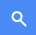
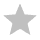
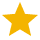
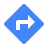

In [22]:
soup = BeautifulSoup(page.content)
soup

In [ ]:
100